In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
inflation = pd.read_csv("./../data/trainset.csv")
print(inflation)

           Fecha  Principales Indices, Precios al Consumidor (INPC)  \
0    1Q Ene 2000                                          44.809270   
1    2Q Ene 2000                                          45.052246   
2    1Q Feb 2000                                          45.272547   
3    2Q Feb 2000                                          45.386070   
4    1Q Mar 2000                                          45.530449   
..           ...                                                ...   
499  2Q Oct 2020                                         108.862000   
500  1Q Nov 2020                                         108.910000   
501  2Q Nov 2020                                         108.801000   
502  1Q Dic 2020                                         109.168000   
503  2Q Dic 2020                                         109.374000   

     Principales Indices, Subyacente  \
0                          48.801160   
1                          49.137179   
2                          

<AxesSubplot:xlabel='Fecha'>

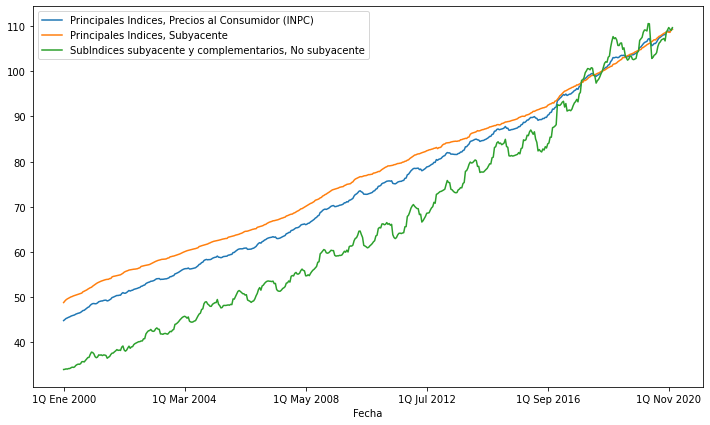

In [35]:

inflation.plot(x="Fecha", figsize=(12, 7))